In [2]:
import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ml_from_scratch.neighbors import baseKNN, regressionKNN, classificationKNN

Initial `baseKNN` testing

In [3]:
# generate sample data
np.random.seed(666)
X_train = np.random.rand(15, 2) * 100 # 15 rows, 2 kolom
y_train = np.arange(15)

display(X_train, y_train)

array([[70.04371219, 84.41866429],
       [67.65143359, 72.78580572],
       [95.14579574,  1.2703197 ],
       [41.35876988,  4.88127938],
       [ 9.99285613, 50.80663058],
       [20.02475393, 74.41541688],
       [19.2892003 , 70.08447522],
       [29.32281059, 77.44794543],
       [ 0.51088388, 11.28576536],
       [11.0953672 , 24.76682287],
       [ 2.32362992, 72.73211542],
       [34.0034942 , 19.75031564],
       [90.91795928, 97.8346985 ],
       [53.28025441, 25.91318494],
       [58.38126188, 32.56906529]])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [4]:
# init base knn
model = baseKNN(k=3, metric="euclidean")

# fit model 
model.fit(X_train, y_train)

# set test point
test_point = np.array([[30, 15]])

# find nearest neighbors
nearest_neighbors, nearest_neighbors_distances = model._get_nearest_neighbors(test_point)
display(print(f"calculated nearest distance: {nearest_neighbors_distances}"),
        print(f"labels of the nearest neighbors: {nearest_neighbors}"))

calculated nearest distance: [ 6.21236384 15.21217145 21.27853309]
labels of the nearest neighbors: [11  3  9]


None

None

More `baseKNN` testing with Pandas

In [5]:
# generate sample data
np.random.seed(666)
X_train = np.random.rand(15, 2) * 100 # 15 rows, 2 kolom
y_train = np.arange(15)

# build dataframe
data = np.hstack((X_train, y_train.reshape(-1, 1))) # combine x dan y secara horizontal
sample_df = pd.DataFrame(data, columns=["Feature_1", "Feature_2", "Target"])

# display dataframe
sample_df

,Feature_1,Feature_2,Target
0,70.043712,84.418664,0.0
1,67.651434,72.785806,1.0
2,95.145796,1.270320,2.0
3,41.358770,4.881279,3.0
4,9.992856,50.806631,4.0
5,20.024754,74.415417,5.0
6,19.289200,70.084475,6.0
7,29.322811,77.447945,7.0
8,0.510884,11.285765,8.0
9,11.095367,24.766823,9.0


In [6]:
# init base knn
model = baseKNN(k=3, metric="euclidean")

# fit model 
X_train = sample_df.drop(columns="Target", axis=0)
y_train = sample_df["Target"]
model.fit(X_train, y_train)

model

In [7]:
# set test point
test_point = np.array([[60, 14]])

# find nearest neighbors
nearest_neighbors, nearest_neighbors_distances = model._get_nearest_neighbors(test_point)

display(print(f"calculated nearest distance: {nearest_neighbors_distances}"),
        print(f"labels of the nearest neighbors: {nearest_neighbors}"))

calculated nearest distance: [13.67768095 18.63948763 20.75202463]
labels of the nearest neighbors: [13. 14.  3.]


None

None

Initial `regressionKNN` testing

In [8]:
# generate sample data
np.random.seed(666)
X_train = np.random.rand(15, 2) * 100 # 15 rows, 2 kolom
y_train = np.arange(15)

# build dataframe
data = np.hstack((X_train, y_train.reshape(-1, 1))) # combine x dan y secara horizontal
sample_df = pd.DataFrame(data, columns=["Feature_1", "Feature_2", "Target"])

# display dataframe
sample_df

,Feature_1,Feature_2,Target
0,70.043712,84.418664,0.0
1,67.651434,72.785806,1.0
2,95.145796,1.270320,2.0
3,41.358770,4.881279,3.0
4,9.992856,50.806631,4.0
5,20.024754,74.415417,5.0
6,19.289200,70.084475,6.0
7,29.322811,77.447945,7.0
8,0.510884,11.285765,8.0
9,11.095367,24.766823,9.0


In [9]:
# init regression knn
model = regressionKNN(k=3, metric="euclidean")

# fit model 
X_train = sample_df.drop(columns="Target", axis=0)
y_train = sample_df["Target"]
model.fit(X_train, y_train)

model

In [10]:
# set test point
test_point = np.array([[70, 70]])

# predict
prediction, nearest_neighbors, nearest_neighbors_distances = model.predict(test_point)


display(print(f"prediction: {prediction}"),
        print(f"nearest neighbors: {nearest_neighbors}"),
        print(f"calculated nearest distance: {nearest_neighbors_distances}"))

prediction: [4.33333333]
nearest neighbors: [ 1.  0. 12.]
calculated nearest distance: [ 3.64369012 14.41873054 34.81855053]


None

None

None

Initial `classificationKNN` testing

In [11]:
np.random.seed(555)

n_samples = 15
feature1_class0 = np.random.uniform(1, 20, n_samples)
feature2_class0 = np.random.uniform(5, 20, n_samples)
y_class0 = np.zeros(n_samples)

feature1_class1 = np.random.uniform(18, 30, n_samples)
feature2_class1 = np.random.uniform(22, 35, n_samples)
y_class1 = np.ones(n_samples)

X_train = np.vstack((np.column_stack((feature1_class0, feature2_class0)),
                     np.column_stack((feature1_class1, feature2_class1))))
y_train = np.hstack((y_class0, y_class1))

sample_df = pd.DataFrame(X_train, columns=["Feature_1", "Feature_2"])
sample_df["Target"] = y_train

test_point = np.array([[19, 19]])

sample_df

,Feature_1,Feature_2,Target
0,14.638848,13.167030,0.0
1,1.909248,5.617921,0.0
2,18.944968,12.022494,0.0
3,14.041221,18.331201,0.0
4,12.042939,12.143878,0.0
5,3.710894,11.187335,0.0
6,18.972464,14.241598,0.0
7,7.459821,9.821248,0.0
8,12.788274,13.713039,0.0
9,9.606233,10.949211,0.0


In [12]:
test_point[0]

array([19, 19])

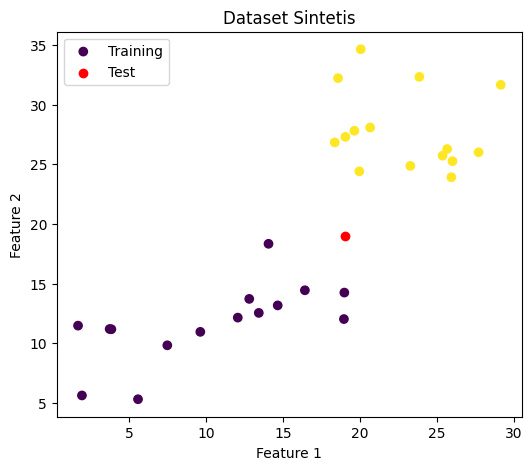

In [13]:
plt.figure(figsize=(6,5))
plt.scatter(sample_df["Feature_1"], sample_df["Feature_2"], c=sample_df["Target"], label="Training")
plt.scatter(test_point[0][0], test_point[0][1], color="red", label="Test", zorder=5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dataset Sintetis")
plt.legend()
plt.show()

In [14]:
# init classification knn
model = classificationKNN(k=7, metric="euclidean")

# fit model 
X_train = sample_df.drop(columns="Target", axis=0)
y_train = sample_df["Target"]
model.fit(X_train, y_train)

model

In [16]:
# predict
prediction = model.predict(test_point)


print(f"prediction: {prediction}")

prediction: [{'class': 0.0, 'probability': 0.7142857142857143}]
